In [1]:
#Base library import
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
path = "data/train.csv"
data = pd.read_csv(path)

In [3]:
data.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
#Data Information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### Checking Duplicate Data

In [5]:
data.duplicated().sum() 

0

No duplicate data

### Checking for missing values

In [6]:
pd.options.display.max_rows=None # Show all columns
data.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

19 features have missing values

### Missing value handling

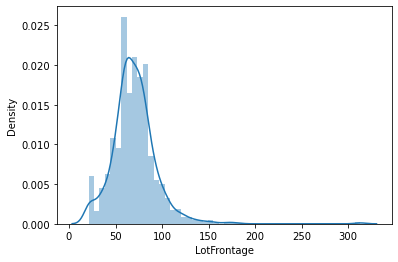

In [7]:
# LotFrontage
sns.distplot(data.LotFrontage)
plt.show()

It's basically a positive distribution, mean value

In [8]:
## Check the percentage of missing values
print('Percentage of missing values:',data.LotFrontage.isnull().sum()/len(data)*100)

Percentage of missing values: 17.73972602739726


In [9]:
## Fill in missing values with mean
data.loc[data['LotFrontage'].isnull()==True,'LotFrontage']=data['LotFrontage'].mean()  ## getting the mean

In [10]:
#View the percentage of missing values for 'Alley', 'PoolQC', 'Fence', 'MiscFeature'
#Object data. Only the percentage of missing values can be viewed

d1=data[['Alley','PoolQC','Fence','MiscFeature']]
a=d1.isnull().sum()/len(d1)*100
print(a)

Alley          93.767123
PoolQC         99.520548
Fence          80.753425
MiscFeature    96.301370
dtype: float64


These four features are deleted because of the large proportion of missing values

In [11]:
## Delete
data.drop(['Alley','PoolQC','Fence','MiscFeature'],axis=1,inplace=True)

In [12]:
# View the percentage of missing values for BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2
# These features related to the basement
d2=data[['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2']]
b=d2.isnull().sum()/len(d2)*100
print(b)

BsmtQual        2.534247
BsmtCond        2.534247
BsmtExposure    2.602740
BsmtFinType1    2.534247
BsmtFinType2    2.602740
dtype: float64


In [13]:
# Filled with NA, means no basement
data['BsmtQual']=data['BsmtQual'].fillna('NA')
data['BsmtCond']=data['BsmtCond'].fillna('NA')
data['BsmtExposure']=data['BsmtExposure'].fillna('NA')
data['BsmtFinType1']=data['BsmtFinType1'].fillna('NA')
data['BsmtFinType2']=data['BsmtFinType2'].fillna('NA')

In [14]:
# MasVnrType，view the description of MasVnrType
data.MasVnrType.value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

"none" takes up the majority of the data, so the missing value is filled with none

In [15]:
data.loc[data['MasVnrType'].isnull()==True,'MasVnrType']='None'

<AxesSubplot:xlabel='MasVnrArea', ylabel='Density'>

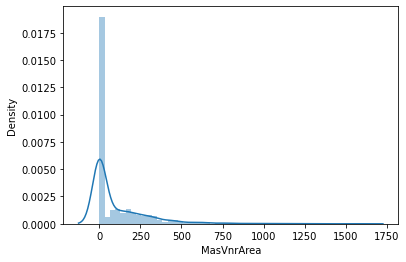

In [16]:
# Masonry，View the distribution of data for "Masnory" 
sns.distplot(data.MasVnrArea)

Most of the data is concentrated in "0"

In [17]:
# 'GarageType','GarageYrBlt','GarageFinish','GarageQual','GarageCond'，View the percentage of missing values
d3=data[['GarageType','GarageYrBlt','GarageFinish','GarageQual','GarageCond' ]]
c=d3.isnull().sum()/len(d3)*100
print(c)

GarageType      5.547945
GarageYrBlt     5.547945
GarageFinish    5.547945
GarageQual      5.547945
GarageCond      5.547945
dtype: float64


In [18]:
# Filled with "0"
data.loc[data['MasVnrArea'].isnull()==True,'MasVnrArea']= 0

In [19]:
# Filled with "NA", means no garage
data['GarageType']=data['GarageType'].fillna('NA')
data['GarageFinish']=data['GarageFinish'].fillna('NA')
data['GarageQual']=data['GarageQual'].fillna('NA')
data['GarageCond']=data['GarageCond'].fillna('NA')

<AxesSubplot:xlabel='GarageYrBlt', ylabel='Density'>

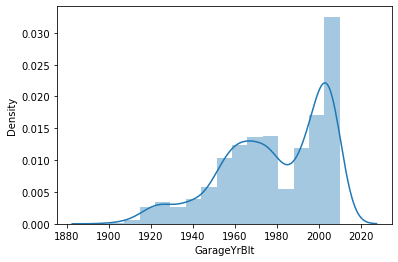

In [20]:
# GarageYrblt,View data distribution
sns.distplot(data.GarageYrBlt)

In [21]:
# The year is usually replaced by the median
data.loc[data['GarageYrBlt'].isnull()==True,'GarageYrBlt']= data.GarageYrBlt.median()

In [22]:
# Electrical，View description of features
data.Electrical.value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [23]:
# "SBrkr" has the largest proportion, so it is used instead of the missing value - the plural idea
data.loc[data['Electrical'].isnull()==True,'Electrical']='SBrkr'

In [24]:
# FireplaceQu，View description of features
data.FireplaceQu.value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [25]:
#Filled with "NA", means no fireplace
data.loc[data['FireplaceQu'].isnull()==True,'FireplaceQu']='NA'

### Check again for missing values

In [26]:
data.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual 

### Plotting heatmap to see the correlation

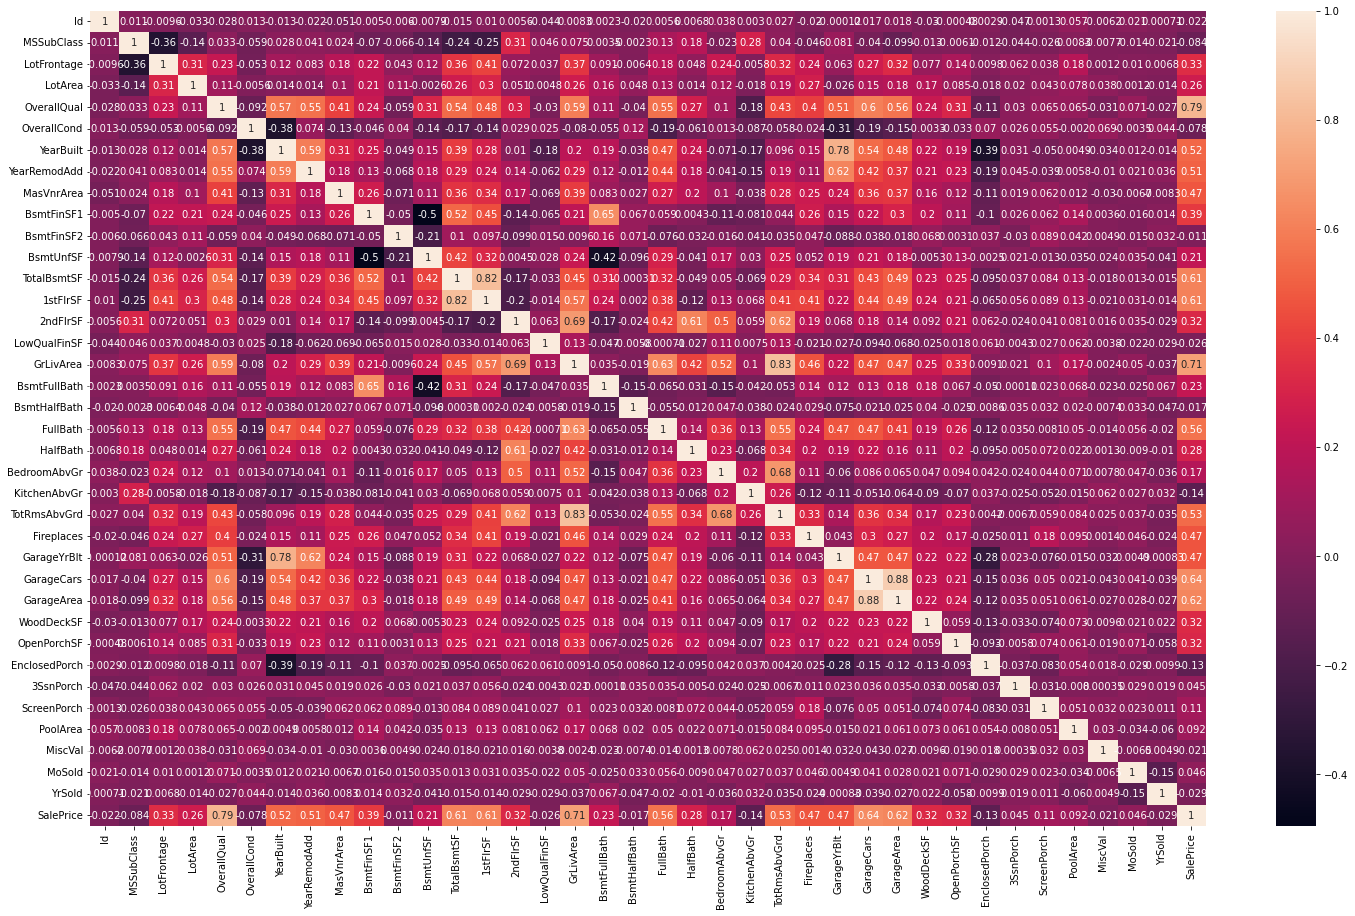

In [27]:
plt.figure(figsize=(25,15))
sns.heatmap(data.corr(),annot=True)
plt.show()

### Correlation of features, GrLivArea and OverallQual are highly correlated with house prices. Therefore the outliers of these two features also have a high impact on house prices

### Outlier analysis

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

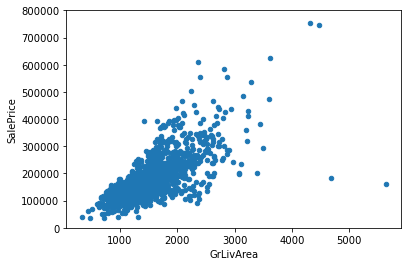

In [28]:
# Observe the scatter plot of GrLivArea with house prices
var = 'GrLivArea'
data_var = pd.concat([data['SalePrice'], data[var]], axis=1)
data_var.plot.scatter(x=var, y='SalePrice', ylim=(0, 800000))

As can be seen from the graph, there are individual outliers, with areas greater than 4000 and prices less than 200000
---The normal distribution is according to the larger the area the higher the price, these points do not follow the general rule

In [29]:
# Remove outliers
data = data.drop(data[(data['GrLivArea']>4000) & (data['SalePrice']<300000)].index)
data.shape

(1458, 77)

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

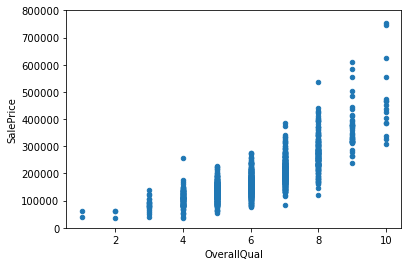

In [30]:
OveQ = data['OverallQual']
data_OveQ = pd.concat([data['SalePrice'], OveQ], axis=1)
data_OveQ.plot.scatter(x = 'OverallQual', y = 'SalePrice', ylim=(0, 800000))

No outliers in "OverallQual"

In [31]:
## View some continuous data
box=data[['LotArea','YearBuilt','BsmtFinSF1','1stFlrSF','2ndFlrSF','LotFrontage', 'MasVnrArea', 'GarageYrBlt']]
box.head(5)

,LotArea,YearBuilt,BsmtFinSF1,1stFlrSF,2ndFlrSF,LotFrontage,MasVnrArea,GarageYrBlt
0,8450,2003,706,856,854,65.0,196.0,2003.0
1,9600,1976,978,1262,0,80.0,0.0,1976.0
2,11250,2001,486,920,866,68.0,162.0,2001.0
3,9550,1915,216,961,756,60.0,0.0,1998.0
4,14260,2000,655,1145,1053,84.0,350.0,2000.0


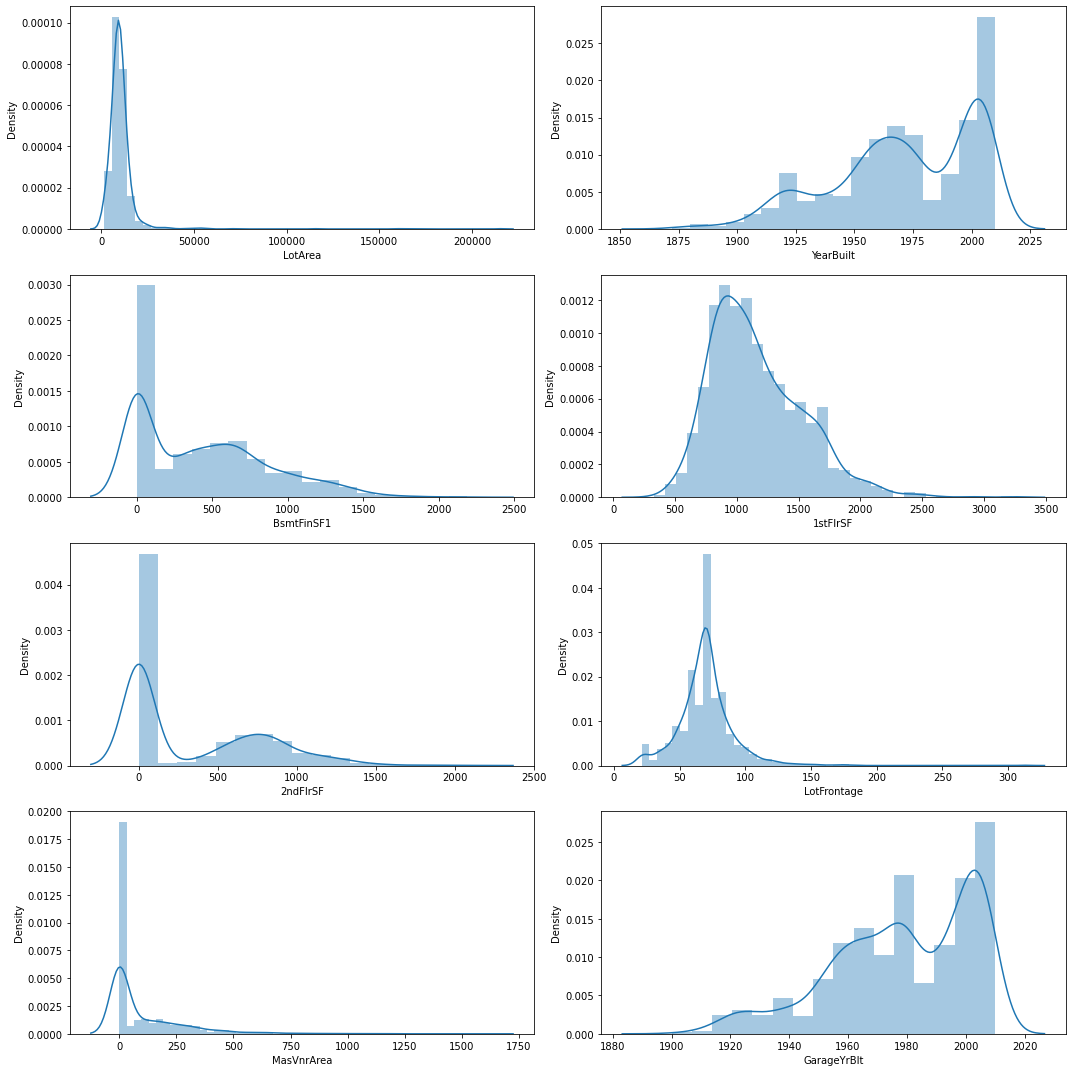

In [32]:
# View the distribution graph for some of the continuous data. 
# Most of the data may have skewness due to outliers and may not conform to the standard normal distribution
plt.figure(figsize=(15,15),facecolor='white')

plotnum=1 
for c in box:
    if(plotnum<9):
        a=plt.subplot(4,2,plotnum)
        sns.distplot(box[c])
    plotnum+=1
plt.tight_layout() 

### Checking the skewness of non-object data

In [33]:
from scipy.stats import skew

numerical_features = data.dtypes[data.dtypes != 'object'].index

skewed_features = data[numerical_features].apply(lambda x: skew(x.dropna())).sort_values(ascending = False)

skewness = pd.DataFrame({'skew':skewed_features})

skewness

,skew
MiscVal,24.434913
PoolArea,15.932532
LotArea,12.560986
3SsnPorch,10.286510
LowQualFinSF,8.995688
KitchenAbvGr,4.480268
BsmtFinSF2,4.247550
ScreenPorch,4.114690
BsmtHalfBath,4.095895
EnclosedPorch,3.083987


### Skewness with "box-cox"

In [34]:
# importing box-cox1p
from scipy.special import boxcox1p

# defining skewed features
skewed_features = skewness.index

lamda = 0.15
for features in skewed_features:
    data[features] += 1
    data[features] = boxcox1p(data[features], lamda)
data[skewed_features] = np.log1p(data[skewed_features])
print("处理了{}个偏度".format(skewness.shape[0]))

处理了38个偏度


### Changing object data to continuous data

In [35]:
# Get all object data
data_object = data.select_dtypes(include = "object").columns
print (data_object)

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')


In [36]:
# label coding. Changing object data to continuous data

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for features in data_object:
    data[features] = le.fit_transform(data[features].astype(str))

print (data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1458 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1458 non-null   float64
 1   MSSubClass     1458 non-null   float64
 2   MSZoning       1458 non-null   int32  
 3   LotFrontage    1458 non-null   float64
 4   LotArea        1458 non-null   float64
 5   Street         1458 non-null   int32  
 6   LotShape       1458 non-null   int32  
 7   LandContour    1458 non-null   int32  
 8   Utilities      1458 non-null   int32  
 9   LotConfig      1458 non-null   int32  
 10  LandSlope      1458 non-null   int32  
 11  Neighborhood   1458 non-null   int32  
 12  Condition1     1458 non-null   int32  
 13  Condition2     1458 non-null   int32  
 14  BldgType       1458 non-null   int32  
 15  HouseStyle     1458 non-null   int32  
 16  OverallQual    1458 non-null   float64
 17  OverallCond    1458 non-null   float64
 18  YearBuil

## Data prediction analysis

### Separating the training and test sets

In [37]:
x=data.drop(['Id','SalePrice'],axis=1) # Eigenvalues
y=data['SalePrice']  # Target values

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=0)

### Feature engineering - data normalisation
### Prevent the original size of the data affecting the weighting during training

In [38]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
X_train = std.fit_transform(X_train)
X_test = std.transform(X_test)

In [39]:
print(X_train.shape)
print(X_test.shape)

(1166, 75)
(292, 75)


In [40]:
### Performing feature dimensionality reduction
### using PCA to reduce dimensionality, which can eliminate noise to a certain extent
from sklearn.decomposition import PCA
pca = PCA(0.95)    # 90% of the features of the data are retained
pca.fit(X_train)

X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

print(X_test.shape)
print(X_train.shape)

(292, 57)
(1166, 57)


### Linear regression model

Prediction Accuracy： 0.9024059261789306
MAE： 0.01720238347159995
MSE： 0.000502296300577832
RMSE： 0.02241196779798311
0.9020419797119015


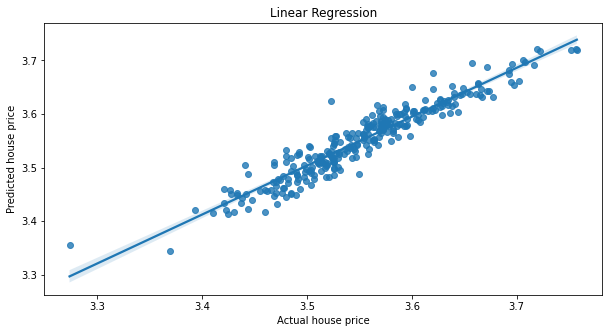

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error   # Mean Square Error
from sklearn.metrics import mean_absolute_error  # Mean Absolute Error
from sklearn.metrics import r2_score             # Prediction Accuracy
lreg = LinearRegression()
lreg.fit(X_train, y_train)

# Get predictions from the test set
ylreg_predict = lreg.predict(X_test)
lreg_score = lreg.score(X_test, y_test)



# Error analysis - usually using MSE & MAE,    MSE-overfitting, MAE-underfitting
mse_LReg = mean_squared_error(y_test, ylreg_predict)     # Mean Square Error
mae_LReg = mean_absolute_error(y_test, ylreg_predict)    # Mean Absolute Error
rmse_LReg = np.sqrt(mse_LReg)                            # RMSE


# Prediction Accuracy
pa_LReg = r2_score(y_test, ylreg_predict)

print("Prediction Accuracy：", pa_LReg)
print("MAE：",mae_LReg)
print("MSE：",mse_LReg)
print("RMSE：", rmse_LReg)


print(lreg.score(X_train, y_train))


# Plotting the regression scatter plot of predicted and true values
plt.figure(figsize=(10, 5))
x = np.linspace(0, 292, 292)
sns.regplot(y_test, ylreg_predict)
plt.xlabel("Actual house price")
plt.ylabel("Predicted house price")
plt.title("Linear Regression")
plt.show()

Model prediction accuracy is around 90%, and the MAE, MSE and RMSE are good

## Decision tree model
Decision trees have a natural problem of overfitting. The reason for this is that decision trees are too sensitive to noise 

Prediction Accuracy： 0.794514488656058
MAE： 0.02427533411427213
MSE： 0.0010575909799568528
RMSE： 0.032520623917090714
0.8393449191146005


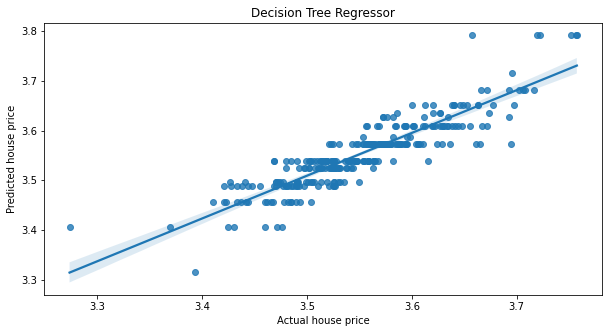

In [42]:
from sklearn.tree import DecisionTreeRegressor
dt_reg = DecisionTreeRegressor(max_depth = 4, random_state=0)
dt_reg.fit(X_train, y_train)
dt_score = dt_reg.score(X_test, y_test)
dt_predict = dt_reg.predict(X_test)
print("Prediction Accuracy：",dt_score)


mse_DtReg = mean_squared_error(y_test, dt_predict)     # MSE
mae_DtReg = mean_absolute_error(y_test, dt_predict)    # MAE
rmse_Dt = np.sqrt(mse_DtReg)                           # RMSE


print("MAE：",mae_DtReg)
print("MSE：",mse_DtReg)
print("RMSE：", rmse_Dt)
print(dt_reg.score(X_train, y_train))

plt.figure(figsize=(10, 5))
x = np.linspace(0, 292, 292)
sns.regplot(y_test, dt_predict)
plt.xlabel("Actual house price")
plt.ylabel("Predicted house price")
plt.title("Decision Tree Regressor")
plt.show()

## Random Forest Model

Prediction Accuracy： 0.8756806306983648
MAE： 0.0190952398324328
MSE： 0.000639845810769911
RMSE： 0.025295173665541633


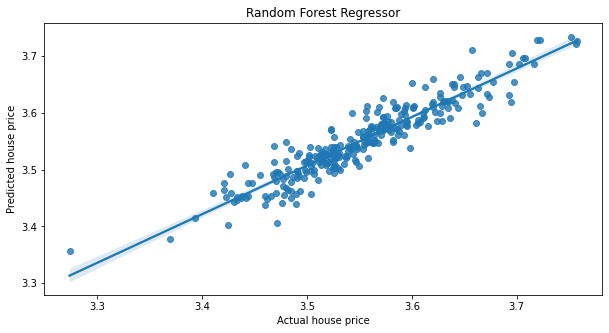

In [43]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)
rfr_score = rfr.score(X_test, y_test)
print("Prediction Accuracy：", rfr_score)
rfr_predict = rfr.predict(X_test)


mse_rfr = mean_squared_error(y_test, rfr_predict)     # MSE
mae_rfr = mean_absolute_error(y_test, rfr_predict)    # MAE
rmse_rfr=np.sqrt(mse_rfr)                             # RMSE

print("MAE：",mae_rfr)
print("MSE：",mse_rfr)
print("RMSE：", rmse_rfr)

plt.figure(figsize=(10, 5))
x = np.linspace(0, 292, 292)
sns.regplot(y_test, rfr_predict)
plt.xlabel("Actual house price")
plt.ylabel("Predicted house price")
plt.title("Random Forest Regressor")
plt.show()

### Random forest parameter tuning

In [44]:
from sklearn.model_selection import RandomizedSearchCV

random_grid = {'n_estimators': [100,200,300,400,500,600],  ## Number of decision trees
               'max_features': ['auto', 'sqrt'],           ## The maximum number of features considered during partitioning
               'max_depth': [10, 15,20,25],                ## The maximum depth of the decision tree
               'min_samples_split':  [2, 5, 10],           ## Minimum number of samples required for internal node repartition
               'min_samples_leaf': [1, 2, 4],              ## Minimum number of samples of leaf nodes
               'bootstrap': [True, False]}                ## Whether the sample set is sampled with put back to build the tree

hyper_tuning=RandomizedSearchCV(estimator=rfr,param_distributions=random_grid,n_iter=10,cv=5,verbose=5,random_state=2)

hyper_tuning.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=500;, score=0.768 total time=   1.6s
[CV 2/5] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=500;, score=0.705 total time=   1.6s
[CV 3/5] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=500;, score=0.734 total time=   1.6s
[CV 4/5] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=500;, score=0.666 total time=   1.6s
[CV 5/5] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=500;, score=0.777 total time=   1.6s
[CV 1/5] END bootstrap=True, max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200;, score=0.763 total time=   0.6s
[CV 2/5] END boo

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 15, 20, 25],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600]},
                   random_state=2, verbose=5)

In [45]:
hyper_tuning.best_params_  # Get the best parameters

{'n_estimators': 400,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 25,
 'bootstrap': True}

Prediction Accuracy： 0.8748623375891856
MAE： 0.019089146104890382
MSE： 0.0006440573943777698
RMSE： 0.02537828588336434
0.9579589842668518


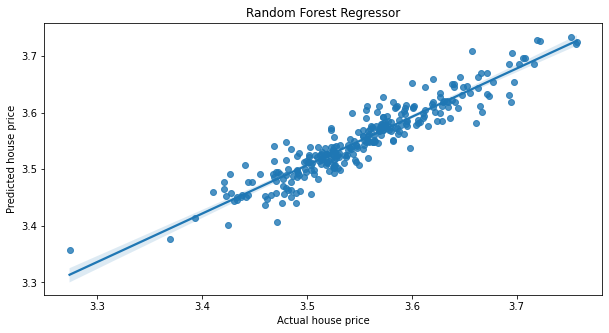

In [46]:
rfr_cv = RandomForestRegressor(n_estimators = 400, min_samples_split = 2, min_samples_leaf = 4, max_features = 'auto', max_depth = 25, bootstrap=True)
rfr_cv.fit(X_train, y_train)
rfr_cv_score = rfr_cv.score(X_test, y_test)
print("Prediction Accuracy：", rfr_cv_score)
rfr_cv_predict = rfr_cv.predict(X_test)


mse_rfr_cv = mean_squared_error(y_test, rfr_cv_predict)     # MSE
mae_rfr_cv = mean_absolute_error(y_test, rfr_cv_predict)    # MAE
rmse_rfr_cv=np.sqrt(mse_rfr_cv)                             # RMSE

print("MAE：",mae_rfr_cv)
print("MSE：",mse_rfr_cv)
print("RMSE：", rmse_rfr_cv)
print(rfr_cv.score(X_train, y_train))

plt.figure(figsize=(10, 5))
x = np.linspace(0, 292, 292)
sns.regplot(y_test, rfr_predict)
plt.xlabel("Actual house price")
plt.ylabel("Predicted house price")
plt.title("Random Forest Regressor")
plt.show()

## Comparison of model scores

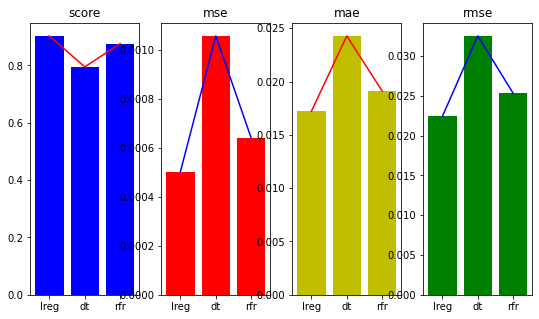

In [47]:
scoreAll = np.array([lreg_score,dt_score,rfr_score])
mseAll = np.array([mse_LReg,mse_DtReg,mse_rfr])
maeAll = np.array([mae_LReg,mae_DtReg,mae_rfr])
rmseAll = np.array([rmse_LReg,rmse_Dt,rmse_rfr,])

plt.figure(figsize=(9,5))
plt.subplot(141)
langs = ['lreg', 'dt', 'rfr']
plt.bar(langs, scoreAll,color='b')
plt.plot(scoreAll, color='r')
plt.title('score')
plt.subplot(142)
langs = ['lreg','dt', 'rfr']
plt.bar(langs, mseAll,color='r')
plt.plot(mseAll, color='b')
plt.title('mse')
plt.subplot(143)
langs = ['lreg','dt', 'rfr']
plt.bar(langs, maeAll,color='y')
plt.plot(maeAll, color='r')
plt.title('mae')
plt.subplot(144)
plt.bar(langs, rmseAll, color = 'green')
plt.plot(rmseAll, color='b')
plt.title("rmse")
plt.show()